In [1]:
import pandas as pd
import os
from utils import show_df
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
import ftfy
import pickle
%matplotlib inline

os.chdir('D:\Project\Twitter_depression_detector\data')
os.getcwd()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jhbmu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'D:\\Project\\Twitter_depression_detector\\data'

In [2]:
# Reads the json generated from the CLI commands above and creates a pandas dataframe
negative_df = pd.read_csv('cleaned_merged_depression_tweets.csv')
positive_df=pd.read_csv('positive_tweets.csv')

# label the dataset

In [3]:
negative_df['label']=1
positive_df['label']=0

In [4]:
negative_df=negative_df.sample(frac=1)

In [5]:
positive_df=positive_df.sample(frac=1)

# Create samples with different ratios

In [6]:
#get test samples
positive_test_sample=positive_df.iloc[40000:50000][:]
negative_test_sample=negative_df.iloc[40000:50000][:]


#1:1
positive_sample_1=positive_df.iloc[0:20000][:]
negative_sample_1=negative_df.iloc[0:20000][:]
sample_1=pd.concat([positive_sample_1,negative_sample_1])

#2:1
positive_sample_2=positive_df.iloc[0:26667][:]
negative_sample_2=negative_df.iloc[0:13333][:]
sample_2=pd.concat([positive_sample_2,negative_sample_2])

#1:2
positive_sample_3=positive_df.iloc[0:26667][:]
negative_sample_3=negative_df.iloc[0:13333][:]
sample_3=pd.concat([positive_sample_3,negative_sample_3])


In [7]:
sample_1

,renderedContent,mentionedUserCount,label
46092,@katriord You snuck in on the strength of your...,1,0
36988,watching Katt Williams: Its Pimpin Pimpin....A...,0,0
41731,just watched the New Moon trailer. Bella would...,0,0
73176,"Having drinks at Fridays with Bre, Patrick, As...",1,0
54624,@nicolehunterrr no problem I'll probs be the ...,1,0
...,...,...,...
18906,Travelling for 2 hours to go to college just f...,0,1
4583,@GinnyGinny_1 How can anyone with half a brain...,1,1
26265,I will not let my Depression control me. I wil...,0,1
84327,my mental health hasn’t been the best lately &...,0,1


# wordcloud analysis 

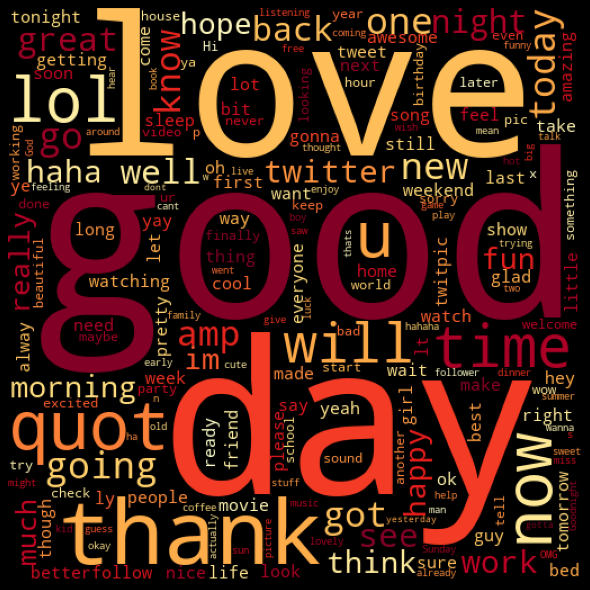

In [8]:

positive_words = ' '.join(list(sample_1[sample_1['label'] == 0]['renderedContent']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="YlOrRd").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

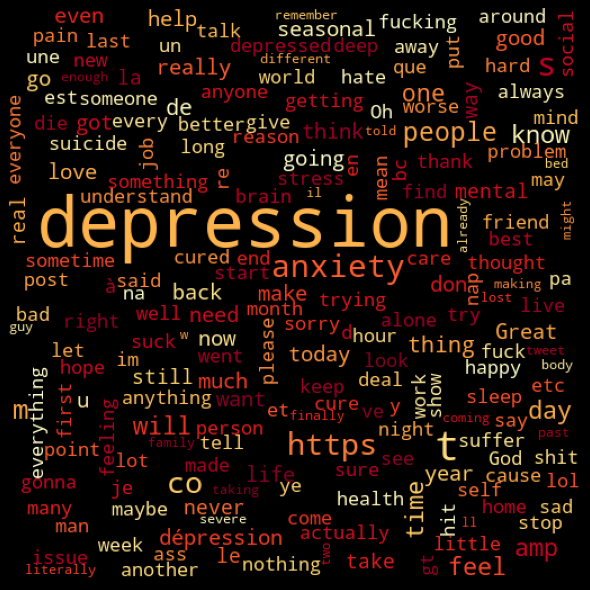

In [9]:

negative_words = ' '.join(list(sample_1[sample_1['label'] == 1]['renderedContent']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="YlOrRd").generate(negative_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

# See the length of the tweet

In [10]:
sample_1['len']=[len(x) for x in sample_1['renderedContent']]
sample_1.head()


,renderedContent,mentionedUserCount,label,len
46092,@katriord You snuck in on the strength of your...,1,0,81
36988,watching Katt Williams: Its Pimpin Pimpin....A...,0,0,133
41731,just watched the New Moon trailer. Bella would...,0,0,94
73176,"Having drinks at Fridays with Bre, Patrick, As...",1,0,87
54624,@nicolehunterrr no problem I'll probs be the ...,1,0,69


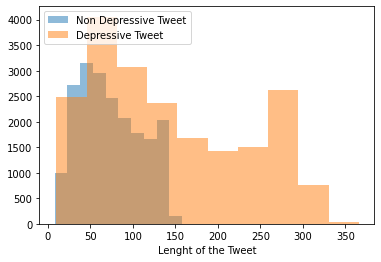

<Figure size 432x288 with 0 Axes>

In [11]:
import numpy as np
import matplotlib.pyplot as plt



plt.xlabel('Lenght of the Tweet')
plt.hist(sample_1[sample_1['label'] == 0]['len'], alpha = 0.5, label='Non Depressive Tweet')
plt.hist(sample_1[sample_1['label'] == 1]['len'], alpha = 0.5, label='Depressive Tweet')
plt.legend(loc='upper left')
plt.show()

plt.savefig('len_sample_1')

In [12]:
# Expand Contraction
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

# Good Preprocessor: Links, twitter handle etc

In [13]:
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.MENTION,p.OPT.RESERVED)

def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = str(tweet)
        # if url links then dont append to avoid news articles
        # also check tweet length, save those > 10 (length of word "depression")
        tweet=p.clean(tweet)
        if re.match("(\w+:\/\/\S+)", tweet) == None:
            #remove hashtag, @mention, emoji and image URLs
#             tweet = re.sub('[^A-Za-z0-9]+', '', tweet)
            
            #fix weirdly encoded texts
            tweet = ftfy.fix_text(tweet)
            
            #expand contraction
            tweet = expandContractions(tweet)

            #remove punctuation
            tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())

            #stop words
            stop_words = set(stopwords.words('english'))
            stop_words.remove('not')
            stop_words.remove('down')
            word_tokens = nltk.word_tokenize(tweet) 
            filtered_sentence = [w for w in word_tokens if not w in stop_words]
            tweet = ' '.join(filtered_sentence)

            #stemming words
            tweet = PorterStemmer().stem(tweet)
            
            cleaned_tweets.append(tweet)

    return cleaned_tweets

In [14]:
tweets_list = [x for x in sample_1['renderedContent']]
# random_tweets_arr = [x for x in random_tweets_df['SentimentText']]
corpus= clean_tweets(tweets_list)
# X_r = clean_tweets(random_tweets_arr)

In [15]:
print(len(corpus))
print(len(tweets_list))

40000
40000


# create tf-idf

In [18]:

from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(
                    ngram_range = (1,6),
                    sublinear_tf = True,
                    max_features = 15000)

X = tv.fit_transform(corpus).toarray()
y = sample_1.iloc[:, -2].values

pickle.dump(tv, open(r'D:\Project\Twitter_depression_detector\src\tv.pkl','wb'))


In [19]:
X.shape

(40000, 15000)

# Splitting Dataset

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

In [21]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=int64), array([1997, 2003], dtype=int64))

In [22]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)


GaussianNB()

In [23]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


# save the model as a pickle file

In [24]:
# Saving model to current directory
# Pickle serializes objects so they can be saved to a file, and loaded in a program again later on.
pickle.dump(classifier, open('D:\Project\Twitter_depression_detector\src\model.pkl','wb'))

# Create the confusion Metrics

<div>
<img src="confusion-matrix.png" width="500"/>
</div>                                                   

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print("     CM   ")
print(cm)

print('Accuracy: {} \nPrecision: {} \nRecall: {}\nF1 score: {}'.format(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred), 
                  
                                                                       +recall_score(y_test, y_pred),
                                                           f1_score(y_test, y_pred)))


     CM   
[[1844  153]
 [ 111 1892]]
Accuracy: 0.934 
Precision: 0.9251833740831296 
Recall: 0.9445831253120319
F1 score: 0.9347826086956522


In [26]:
text=["Lately I have been feeling unsure of myself as a person & an artist"]
print(clean_tweets(text))
test_array= tv.transform(clean_tweets(text)).toarray()
classifier.predict(test_array)

['lately i feeling unsure person artist']


array([0], dtype=int64)

In [27]:
# I am officially done with @kanyewest
# text=["Extreme sadness, lack of energy, hopelessness"]

# text=["I am officially done with @kanyewest"]
text=["Feeling down ..."]
print(clean_tweets(text))
test_array= tv.transform(clean_tweets(text)).toarray()
classifier.predict(test_array)

['feeling down']


array([1], dtype=int64)

In [28]:
text=[" Okay here comes the truth, Im depressed"]
print(clean_tweets(text))
test_array= tv.transform(clean_tweets(text)).toarray()
classifier.predict(test_array)

['okay comes truth im depress']


array([0], dtype=int64)

In [29]:
text=[" what's the purpose of this sad life"]
print(clean_tweets(text))
test_array= tv.transform(clean_tweets(text)).toarray()
classifier.predict(test_array)

['purpose sad lif']


array([0], dtype=int64)

In [30]:
text=[" my daily routine is very simple.  i wake up and immediately want to stop existing"]
print(clean_tweets(text))
test_array= tv.transform(clean_tweets(text)).toarray()
classifier.predict(test_array)

['daily routine simple wake immediately want stop exist']


array([0], dtype=int64)

In [31]:
text=[" my depression and anxiety after another successful panic attack:"]
print(clean_tweets(text))
test_array= tv.transform(clean_tweets(text)).toarray()
classifier.predict(test_array)    
    

['depression anxiety another successful panic attack']


array([1], dtype=int64)

In [32]:
text=[" life doesnt make sense anymore"]
print(clean_tweets(text))
test_array= tv.transform(clean_tweets(text)).toarray()
classifier.predict(test_array)

['life doesnt make sense anymor']


array([0], dtype=int64)

In [33]:
text=[" I will kill myself "]
print(clean_tweets(text))
test_array= tv.transform(clean_tweets(text)).toarray()
classifier.predict(test_array)    

['i kil']


array([1], dtype=int64)

# Code to see the False Negative

In [34]:
for i in range(len(y_pred)):
    if y_test[i]==1:
        if y_pred[i]!=y_test[i]:
            a=tv.inverse_transform(X_test[i])
            b=a[0].tolist()
            print(i,":",' '.join(b),':',y_test[i])


54 : de depress goodbye la : 1
81 : depress im im ready ready : 1
90 : black depress negativity : 1
111 : all bring busy depress distractions friends having just monday rough run shitty thoughts weekend : 1
112 :  : 1
114 : depress good good news goods longer material news : 1
150 : jokes not spel : 1
208 : depress xd : 1
262 : allergies depression heehee seasonal seasonal depression : 1
346 :  : 1
387 : depress life tough : 1
397 : access achieved and anxiety beyond create depression depression anxiety entertain feel feel like find garbage got hungry kick levels like look polish reach success unable : 1
409 : depress fat suck want : 1
419 : back depress falling feel hole massive right right back : 1
436 : crying depress musical peak play post window : 1
476 : 69 depress helping stage thanks : 1
565 :  : 1
580 :  : 1
636 : bed bin clean clothes depress laundry moved : 1
653 : burned never readi : 1
654 : depress get get rid read rid : 1
728 : bernie booth depression down feet fighting 

# Code to see the False Postive

In [35]:
for i in range(len(y_pred)):
    if y_test[i]==0:
        if y_pred[i]!=y_test[i]:
            a=tv.inverse_transform(X_test[i])
            b=a[0].tolist()
            print(i,":",' '.join(b),':',y_test[i])


14 : believe guess know not not know people people really really really believe really not really not know same same people tone : 0
60 : did don facebook got hey homework least millions : 0
132 : bett cause clue dont dont know dumb feel know still want want feel : 0
136 : cunt must overload remember : 0
147 : happy happy right really really happy right : 0
149 : karen miss thanks warm welcome : 0
156 : faking hihi image : 0
164 : account add anyone anyone got got : 0
178 : beer cloud do get get the going grab grill hot in in the is isn it out pool shall sky sun that the the sun there time time to to to get we what : 0
187 : come eh experts full govt hint it km lol room said sarcasm took : 0
204 : blessed followfriday kindness much thank thank much weekend wonderful : 0
211 : disease killing like model one platform symptom the traditional twitter : 0
231 : lazi must pure wait web : 0
238 : 18 6am bands coachella saw total work : 0
240 : believe country cycling eith not not believe peop